In [1]:
from models import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
from models import *
from util import *


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model_name='DummyMedianRegressionModel'
run=0

ntfm_tsfresh = get_problem_features()
ntfm_catch22 = get_problem_features('m4-catch22features.csv')
ntfm = ntfm_tsfresh.join(ntfm_catch22)

pdf = get_problem_algorithm_performance()
X = ntfm.to_numpy()
Y = pdf.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=run)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
model_type = M4MetaModel.get_registered_models()[model_name]

save_dir = f'models/trained/{model_name}_{run}'
try:
    model = model_type.load_model(save_dir)
    print('Model loaded')
except:
    model = model_type()
    print('Model training start')
    model.fit(X_train, Y_train)
    print('Model training end')
    model.save(save_dir)

stats = {}
test_errors = model.error(X_test, Y_test)
stats = {**stats, **{f'test_{k}': v for k, v in test_errors.items()}}
train_errors = model.error(X_train, Y_train)
stats = {**stats, **{f'train_{k}': v for k, v in train_errors.items()}}

test_problem_errors=model.problem_errors(X_test, Y_test, column_names=pdf.columns)
stats = {**stats, **{f'test_{k}': v for k, v in test_problem_errors.items()}}

train_problem_errors = model.problem_errors(X_train, Y_train, column_names=pdf.columns)
stats = {**stats, **{f'train_{k}': v for k, v in train_problem_errors.items()}}

#print(problem_errors(model, X_test, Y_test, column_names=pdf.columns))

#print(stats)

Model loaded


In [4]:
#performance = {}
from collections import defaultdict
performance = defaultdict(lambda: [])

data_ls = []

for model_name, model_class in M4MetaModel.get_registered_models().items():
    #print(model_name)
    next_file = True
    i = 0
    while i>=0:
        try:
            data = pickle.load(open(f'models/stats/{model_name}_{i}.p', "rb"))
            data['model'] = model_name
            data['run'] = i
            data_ls.append(data)
            #print(data)
            performance[model_name].append(data['test_mae'])
            i+=1
        except:
            i = -1

    
#performance
#for k, v in performance.items():
#    print(k, np.mean(v), v)

In [5]:
df = pd.DataFrame(data_ls)
#df

In [6]:
df.groupby(['model']).mean()

test_mae  test_mse  train_mae  train_mse  \
model                                                                  
DummyMeanRegressionModel    0.118675  0.032325   0.119124   0.032543   
DummyMedianRegressionModel  0.105112  0.036500   0.106087   0.036875   
FlamlAutoMLRegressionModel  0.064264  0.013022   0.045535   0.005956   
KNNRegressorModel           0.067599  0.016488   0.054951   0.010824   
KerasNetRegressionModel     0.062140  0.015098   0.057087   0.012471   
MLPRegressorModel           0.068800  0.014833   0.063706   0.011794   
XGBRegressionModel          0.064544  0.013174   0.049658   0.006195   

                            test_a_mae_005  test_a_mse_005  test_a_mae_009  \
model                                                                        
DummyMeanRegressionModel          0.118675        0.032325        0.118675   
DummyMedianRegressionModel        0.105112        0.036500        0.105112   
FlamlAutoMLRegressionModel        0.064264        0.013022        0.064264   
KNNRegressorModel                 0.067599        0.016488        0.067599   
KerasNetRegressionModel           0.062140        0.015098        0.062140   
MLPRegressorModel                 0.068800        0.014833        0.068800   
XGBRegressionModel                0.064544        0.013174        0.064544   

                            test_a_mse_009  test_a_mae_024  test_a_mse_024  \
model                                                                        
DummyMeanRegressionModel          0.032325        0.118675        0.032325   
DummyMedianRegressionModel        0.036500        0.105112        0.036500   
FlamlAutoMLRegressionModel        0.013022        0.064264        0.013022   
KNNRegressorModel                 0.016488        0.067599        0.016488   
KerasNetRegressionModel           0.015098        0.062140        0.015098   
MLPRegressorModel                 0.014833        0.068800        0.014833   
XGBRegressionModel                0.013174        0.064544        0.013174   

                            ...  train_a_mse_Naive2  train_a_mae_RNN  \
model                       ...                                        
DummyMeanRegressionModel    ...            0.032543         0.119124   
DummyMedianRegressionModel  ...            0.036875         0.106087   
FlamlAutoMLRegressionModel  ...            0.005956         0.045535   
KNNRegressorModel           ...            0.010824         0.054951   
KerasNetRegressionModel     ...            0.012471         0.057087   
MLPRegressorModel           ...            0.011794         0.063706   
XGBRegressionModel          ...            0.006195         0.049658   

                            train_a_mse_RNN  train_a_mae_SES  train_a_mse_SES  \
model                                                                           
DummyMeanRegressionModel           0.032543         0.119124         0.032543   
DummyMedianRegressionModel         0.036875         0.106087         0.036875   
FlamlAutoMLRegressionModel         0.005956         0.045535         0.005956   
KNNRegressorModel                  0.010824         0.054951         0.010824   
KerasNetRegressionModel            0.012471         0.057087         0.012471   
MLPRegressorModel                  0.011794         0.063706         0.011794   
XGBRegressionModel                 0.006195         0.049658         0.006195   

                            train_a_mae_Theta  train_a_mse_Theta  \
model                                                              
DummyMeanRegressionModel             0.119124           0.032543   
DummyMedianRegressionModel           0.106087           0.036875   
FlamlAutoMLRegressionModel           0.045535           0.005956   
KNNRegressorModel                    0.054951           0.010824   
KerasNetRegressionModel              0.057087           0.012471   
MLPRegressorModel                    0.063706           0.011794   
XGBRegressionModel                   0.049658     

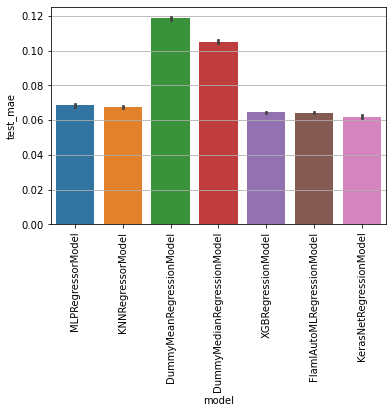

In [7]:
plt.grid(axis='y')
ax = sns.barplot(x="model", y="test_mae", data=df)
plt.xticks(rotation=90)
plt.show()

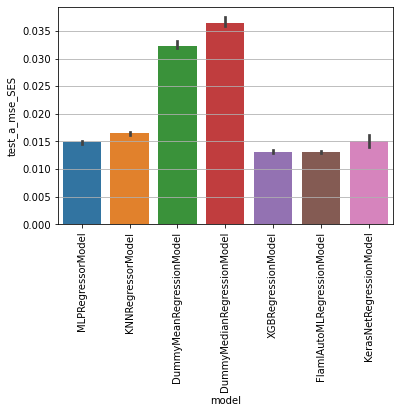

In [12]:
plt.grid(axis='y')
ax = sns.barplot(x="model", y="test_a_mse_SES", data=df)
plt.xticks(rotation=90)
plt.show()